In [189]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Question 1

### 1.1

In [119]:
train_in = pd.read_csv("train_in.csv")

In [120]:
train_out = pd.read_csv("train_out.csv")

In [121]:
train_in = np.array(train_in)
train_out = np.array(train_out)

In [122]:
train_out = np.squeeze(train_out, axis=1)

In [123]:
Cloud = []
for i in range(10):
    number = i
    cloud = train_in[train_out==i]
    Cloud.append(cloud)

In [124]:
Mean = []
for i in range(10):
    mean = np.mean(Cloud[i], axis=0)
    Mean.append(mean)

In [125]:
Cloud = np.array(Cloud)
Mean = np.array(Mean)

Distance = []
for i in range(10):
    cloud = Cloud[i]
    mean = Mean[i]
    Dis = []
    for j in range(len(cloud)):
        dis = np.linalg.norm(cloud[j]-mean)
        Dis.append(dis)
    Dis = np.array(Dis)
    Distance.append(Dis)

Distance = np.array(Distance)

<ipython-input-125-67a27c37a1c8>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Cloud = np.array(Cloud)
<ipython-input-125-67a27c37a1c8>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Distance = np.array(Distance)


In [126]:
Dis_C = np.zeros((10,10))
for i in range(10):
    center_1 = Mean[i]
    for j in range(10):
        center_2 = Mean[j]
        dis_center = np.linalg.norm(center_1-center_2)
        Dis_C[i][j]=dis_center

In [127]:
Dis_C

array([[ 0.        , 14.44960797,  9.33455587,  9.14373367, 10.76984444,
         7.51929626,  8.16301949, 11.86455505,  9.90790174, 11.48887494],
       [14.44960797,  0.        , 10.12532258, 11.7332329 , 10.17378643,
        11.11880041, 10.59793273, 10.74315367, 10.08677677,  9.9320937 ],
       [ 9.33455587, 10.12532258,  0.        ,  8.17828489,  7.93254148,
         7.90679632,  7.31795234,  8.87253107,  7.07751618,  8.88774785],
       [ 9.14373367, 11.7332329 ,  8.17828489,  0.        ,  9.0876078 ,
         6.11875002,  9.29242591,  8.92240093,  7.02042489,  8.35435012],
       [10.76984444, 10.17378643,  7.93254148,  9.0876078 ,  0.        ,
         8.00151741,  8.76599667,  7.58301228,  7.38090899,  6.01040793],
       [ 7.51929626, 11.11880041,  7.90679632,  6.11875002,  8.00151741,
         0.        ,  6.68862915,  9.21195402,  6.96738648,  8.25853807],
       [ 8.16301949, 10.59793273,  7.31795234,  9.29242591,  8.76599667,
         6.68862915,  0.        , 10.8681573 

#### The pair of digits the most difficult to separate is 7 and 9

### 1.2

In [180]:
from sklearn.decomposition import PCA

In [184]:
pca_train = PCA(n_components=2)
principalComponents_train = pca_train.fit_transform(train_in)

In [196]:
x_pca = principalComponents_train[:,0]
y_pca = principalComponents_train[:,1]

Text(0, 0.5, 'PCA Component 2')

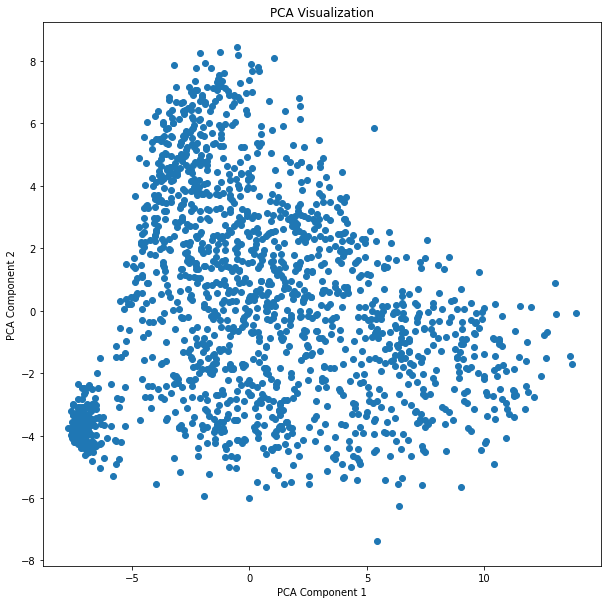

In [202]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.scatter(x_pca, y_pca)
ax.set_title('PCA Visualization')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')


In [204]:
import umap

In [205]:
reducer = umap.UMAP()

In [206]:
embedding = reducer.fit_transform(train_in)
embedding.shape

(1706, 2)

In [207]:
x_umap = embedding[:,0]
y_umap = embedding[:,1]

Text(0, 0.5, 'UMAP Component 2')

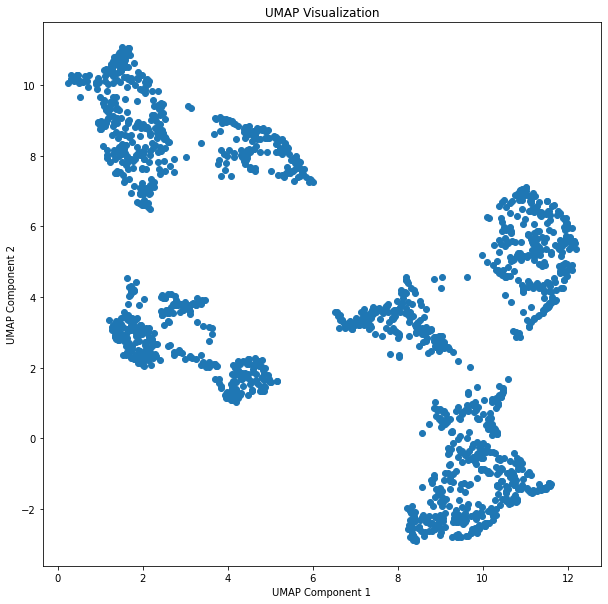

In [208]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.scatter(x_umap, y_umap)
ax.set_title('UMAP Visualization')
ax.set_xlabel('UMAP Component 1')
ax.set_ylabel('UMAP Component 2')

In [209]:
from sklearn.manifold import TSNE

In [211]:
TSNE_embedded = TSNE(n_components=2).fit_transform(train_in)
TSNE_embedded.shape

(1706, 2)

In [213]:
x_tsne = TSNE_embedded[:,0]
y_tsne = TSNE_embedded[:,1]

Text(0, 0.5, 'TSNE Component 2')

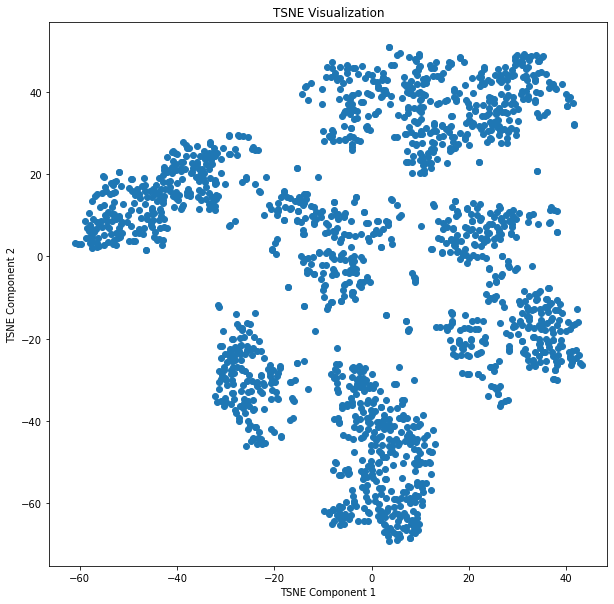

In [214]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.scatter(x_tsne, y_tsne)
ax.set_title('TSNE Visualization')
ax.set_xlabel('TSNE Component 1')
ax.set_ylabel('TSNE Component 2')

### 1.3

In [164]:
Class = []
for i in train_in:
    Dis = []
    for j in range(10):
        mean = Mean[j]
        dis = np.linalg.norm(mean-i)
        Dis.append(dis)
    dis_min = np.amin(Dis)
    clas = float(np.where(Dis==dis_min)[0])
    Class.append(clas)

In [165]:
Class = np.array(Class)
diff = train_out-Class

In [170]:
success_rate = len(np.where(diff==0)[0])/len(train_out)
print(success_rate)

0.8634232121922626


In [171]:
test_in = pd.read_csv("test_in.csv")
test_out = pd.read_csv("test_out.csv")
test_in = np.array(test_in)
test_out = np.array(test_out)

In [173]:
test_out = np.squeeze(test_out, axis=1)

In [174]:
Class_test = []
for i in test_in:
    Dis = []
    for j in range(10):
        mean = Mean[j]
        dis = np.linalg.norm(mean-i)
        Dis.append(dis)
    dis_max = np.amin(Dis)
    clas = float(np.where(Dis==dis_max)[0])
    Class_test.append(clas)

In [176]:
Class_test = np.array(Class_test)
diff_test = test_out - Class_test

In [177]:
success_rate_test = len(np.where(diff_test==0)[0])/len(test_out)
print(success_rate_test)

0.8038038038038038


### 1.4

In [215]:
from sklearn.neighbors import KNeighborsClassifier

In [218]:
k = len(train_in)/10

In [220]:
knn = KNeighborsClassifier(n_neighbors=12)

In [221]:
knn.fit(train_in, train_out)
knn_out = knn.predict(test_in)

/Users/yuzezhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [224]:
diff_knn = knn_out - test_out
success_rate_test = len(np.where(diff_knn==0)[0])/len(test_out)
print(success_rate_test)

0.8788788788788788


In [229]:
from sklearn.metrics import confusion_matrix
conf_m_knn = confusion_matrix(test_out, knn_out)

In [230]:
conf_m_simp = confusion_matrix(test_out, Class_test)

In [231]:
print(conf_m_knn)
print(conf_m_simp)

[[217   0   2   0   1   0   2   0   0   1]
 [  0 119   0   0   0   0   2   0   0   0]
 [  7   3  82   2   0   0   0   3   4   0]
 [  5   0   1  69   0   1   0   0   1   2]
 [  0   5   2   0  71   0   0   1   0   7]
 [  7   0   1   8   2  32   0   2   0   3]
 [  9   1   0   0   1   0  79   0   0   0]
 [  0   4   0   1   2   0   0  56   0   1]
 [  3   3   0   5   0   0   1   2  76   2]
 [  1   2   0   0   1   0   0   6   1  77]]
[[177   0   3   2   4   2  23   1  10   1]
 [  0 120   0   0   0   0   1   0   0   0]
 [  2   0  69   6   8   1   0   2  13   0]
 [  3   0   3  61   1   8   0   0   1   2]
 [  1   3   3   0  69   0   1   1   0   8]
 [  3   0   0   6   3  38   1   0   0   4]
 [  7   0   2   0   2   1  78   0   0   0]
 [  0   2   1   0   5   0   0  50   0   6]
 [  3   2   0   6   3   3   0   0  73   2]
 [  0   5   0   0   8   0   0   5   2  68]]
